In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import sys
sys.path.append("../")
from src.preprocess.common import *
from src.preprocess.complexStyleFeatures import *
from src.preprocess.simpleStyleFeatures import *
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import pickle 
import gensim.downloader
from pprint import pprint
DATA_PATH_TRAIN = "../Data/C50/C50train/"
DATA_PATH_TEST = "../Data/C50/C50test/"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yosef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Simple

In [2]:
def get_datasets(data_path: str = "../Data/C50") -> pd.DataFrame:
    df_test = load_data(f"{data_path}/C50test", 50)
    df_train = load_data(f"{data_path}/C50train", 50)
    return df_train.append(df_test, ignore_index=True)
df = get_datasets()

In [4]:
df_test = load_data("../Data/C50/C50test", 50)

In [3]:
TEST_PART = 0.1

In [6]:
df["author_name"].value_counts()

KevinDrawbaugh       100
KevinMorrison        100
MartinWolk           100
ToddNissen           100
JonathanBirt         100
AlanCrosby           100
NickLouth            100
JimGilchrist         100
TimFarrand           100
JohnMastrini         100
WilliamKazer         100
MatthewBunce         100
DarrenSchuettler     100
MarkBendeich         100
RogerFillion         100
PierreTran           100
ScottHillis          100
DavidLawder          100
MichaelConnor        100
EdnaFernandes        100
KouroshKarimkhany    100
GrahamEarnshaw       100
JanLopatka           100
FumikoFujisaki       100
KarlPenhaul          100
AlexanderSmith       100
SamuelPerry          100
JaneMacartney        100
JoWinterbottom       100
EricAuchard          100
HeatherScoffield     100
LynnleyBrowning      100
BenjaminKangLim      100
LynneO'Donnell       100
PatriciaCommins      100
LydiaZajc            100
AaronPressman        100
BradDorfman          100
RobinSidel           100
MureDickie           100


## Baseline

### Pre

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df["book_text"],df["author_name"],test_size=TEST_PART)

In [20]:
def avg_word_len(df: pd.DataFrame) -> pd.DataFrame:
    avg_word_len = df.astype(str).swifter.apply(
        lambda s: pd.Series(nltk.word_tokenize(s)).map(len).mean()).rename("avg_word_len")
    return pd.DataFrame(avg_word_len)


def avg_sentence_len(df: pd.DataFrame) -> pd.DataFrame:
    sentence_count = df.astype(str).swifter.apply(
        lambda text: pd.Series(nltk.sent_tokenize(text)).map(
            lambda sent: len(nltk.word_tokenize(sent))).mean()).rename("avg_sentence_len")

    return pd.DataFrame(sentence_count)

def hapax_disLegemena(x: pd.DataFrame) -> pd.DataFrame:
    """
    hapax disLegemena Measure for lexicographic diversity: v2/N
    v2 = number of words that appears twice
    N = number of words or number of unique words
    """

    def get_hapax_disLegemena(text: str) -> (float, float):
        words = nltk.word_tokenize(text)
        words_count = Counter(words)
        v2 = len([_ for _, count in words_count.items() if count == 2])
        return pd.Series((v2 / (len(words) + EPSILON), v2 / (len(set(words))+EPSILON)))

    return pd.DataFrame(x.astype(str).swifter.apply(get_hapax_disLegemena)).set_axis(['hapax_disLegemena(H)', 'hapax_disLegemena(S)'], axis=1)


In [21]:
def preprocess(x_train: pd.DataFrame, x_test: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    def helper(x: pd.DataFrame) -> pd.DataFrame:
        return pd.concat([avg_word_len(x),avg_sentence_len(x),hapax_disLegemena(x)], axis=1)
        
    return helper(x_train), helper(x_test)

X_train,X_test = preprocess(X_train,X_test)

Pandas Apply:   0%|          | 0/4500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
# y_train = pd.Categorical(y_train).codes
result = dict(zip(df_test["author_name"],pd.Categorical(df_test["author_name"]).codes))
result

{'AaronPressman': 0,
 'AlanCrosby': 1,
 'AlexanderSmith': 2,
 'BenjaminKangLim': 3,
 'BernardHickey': 4,
 'BradDorfman': 5,
 'DarrenSchuettler': 6,
 'DavidLawder': 7,
 'EdnaFernandes': 8,
 'EricAuchard': 9,
 'FumikoFujisaki': 10,
 'GrahamEarnshaw': 11,
 'HeatherScoffield': 12,
 'JaneMacartney': 14,
 'JanLopatka': 13,
 'JimGilchrist': 15,
 'JoeOrtiz': 17,
 'JohnMastrini': 18,
 'JonathanBirt': 19,
 'JoWinterbottom': 16,
 'KarlPenhaul': 20,
 'KeithWeir': 21,
 'KevinDrawbaugh': 22,
 'KevinMorrison': 23,
 'KirstinRidley': 24,
 'KouroshKarimkhany': 25,
 'LydiaZajc': 26,
 "LynneO'Donnell": 27,
 'LynnleyBrowning': 28,
 'MarcelMichelson': 29,
 'MarkBendeich': 30,
 'MartinWolk': 31,
 'MatthewBunce': 32,
 'MichaelConnor': 33,
 'MureDickie': 34,
 'NickLouth': 35,
 'PatriciaCommins': 36,
 'PeterHumphrey': 37,
 'PierreTran': 38,
 'RobinSidel': 39,
 'RogerFillion': 40,
 'SamuelPerry': 41,
 'SarahDavison': 42,
 'ScottHillis': 43,
 'SimonCowell': 44,
 'TanEeLyn': 45,
 'TheresePoletti': 46,
 'TimFarrand

### Model

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_depth=7, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, random_state=0)

In [25]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.17      0.40      0.24         5
           1       0.30      0.23      0.26        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        10
           4       0.09      0.11      0.10         9
           5       0.00      0.00      0.00         8
           6       0.10      0.09      0.10        11
           7       0.16      0.23      0.19        13
           8       0.22      0.20      0.21        10
           9       0.12      0.12      0.12         8
          10       0.07      0.14      0.09         7
          11       0.00      0.00      0.00        10
          12       0.14      0.08      0.11        12
          13       0.06      0.20      0.09         5
          14       0.00      0.00      0.00         9
          15       0.38      0.23      0.29        13
          16       0.10      0.07      0.08        14
          17       0.08    

# Using Glove

In [13]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [2]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [28]:
len(glove_vectors)

400000

In [185]:
import re
def tranform_word(word:str) -> np.ndarray:
    word = re.sub(r'[^a-z]', '', word.lower())
    if word in glove_vectors:
        return glove_vectors[word]
    return None

In [277]:
EMBEDDING_SIZE = 50

## Sentence Level

### Preprocess

In [197]:
X_train,X_test,y_train,y_test = train_test_split(df["book_text"],df["author_name"],test_size=TEST_PART)

In [198]:
def num_sentences_based_chucking(df: pd.DataFrame, chunk_size: int):
    rows = []
    for row in df:
        sentences = nltk.tokenize.sent_tokenize(row)
        curr_chunk = []
        for sentence in sentences:
            curr_chunk.append(sentence)
            if len(curr_chunk) == chunk_size:
                rows.append("".join(curr_chunk))
                curr_chunk = []
        
        rows.append("".join(curr_chunk))  # add the last one
    return pd.DataFrame(rows)

In [199]:
NUM_OF_SENTENCE_CHUNK = 3
X_train = num_sentences_based_chucking(X_train,NUM_OF_SENTENCE_CHUNK)[0]
X_test = num_sentences_based_chucking(X_test,NUM_OF_SENTENCE_CHUNK)[0]
X_train.shape,X_test.shape

((35535,), (3934,))

#### Decide max number of words

In [116]:
num_words = X_train.swifter.apply(lambda text: len(nltk.word_tokenize(text)))
num_words.describe()

Pandas Apply:   0%|          | 0/35525 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\nanops.py:1675: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)


count    35525.000000
mean        70.791893
std         28.567110
min          0.000000
25%         56.000000
50%         73.000000
75%         90.000000
max        307.000000
Name: 0, dtype: float64

In [120]:
num_words.quantile([0.95,0.97,0.98,0.99])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\nanops.py:1675: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)


0.95    113.00
0.97    118.00
0.98    122.52
0.99    128.00
Name: 0, dtype: float64

In [142]:
num_words[num_words>170]

1353     179
15730    307
21318    195
33340    209
Name: 0, dtype: int64

In [143]:
MAX_LENGTH = 170

#### Continue Preprocess

In [228]:
def pad_matrix(arr:np.ndarray,max_length:int) -> np.ndarray:
    if arr.size == 0:
        return None
    if arr.shape[0] == max_length:
        return arr
    if arr.shape[0] > max_length:
        return arr[:max_length,:]
    return np.concatenate([arr,np.zeros((max_length - arr.shape[0],arr.shape[1]))],axis=0,dtype=float)

In [268]:
def sentence_level_preprocess(text:str):
    words = nltk.word_tokenize(text)
    result = []
    missing_embedding_count = 0
    for word in words:
        embedding = tranform_word(word)
        if embedding is not None:
            result.append(embedding)
        else:
            missing_embedding_count+=1
    return pd.Series({"data": pad_matrix(np.array(result),MAX_LENGTH),"missing_embedding_count":missing_embedding_count})

In [230]:
res = X_test.swifter.apply(sentence_level_preprocess)


Pandas Apply:   0%|          | 0/3934 [00:00<?, ?it/s]

In [281]:
def preprocess(X):
    res = X.swifter.apply(sentence_level_preprocess)["data"].dropna().reset_index(drop=True)
    return np.vstack(res).reshape((res.size,MAX_LENGTH,EMBEDDING_SIZE))


In [282]:
X_test = preprocess(X_test)
X_train = preprocess(X_train)

Pandas Apply:   0%|          | 0/3934 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/35535 [00:00<?, ?it/s]

**Note that we tried to stemm or lemmatize the word before search in glove table but it doesnt help at all**

In [283]:
X_train.shape

(34049, 170, 50)

### Model

In [396]:
from tensorflow.keras.layers import Dense,GRU,AvgPool1D
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pickle

model = Sequential()
model.add(GRU(100,recurrent_dropout=0.2,input_shape=(MAX_LENGTH,EMBEDDING_SIZE),return_sequences=True))
model.add(AvgPool1D(pool_size=(170,)))
model.add(Dense(50, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 170, 100)          45600     
_________________________________________________________________
average_pooling1d_6 (Average (None, 1, 100)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 50)             5050      
Total params: 50,650
Trainable params: 50,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
history = model.fit(x=X_train, y=y_train, epochs=30000, shuffle=True,
          batch_size=200, validation_data=(X_val, y_val),callbacks=[callback])
with open("sentence_level-history") as file:
    pickle.dump(history, file)

In [ ]:
model.save("sentence_level")

## Article Level

### Preprocess
**Problems:**
1. tranform words without glove embedding
2. unequal setence length(padding required)

In [5]:
EMBEDDING_SIZE = 50
NUM_OF_SENTENCE_CHUNK = 3
MAX_LENGTH = 170
TEST_PART = 0.1
X_train,X_test,y_train,y_test = train_test_split(df["book_text"],df["author_name"],test_size=TEST_PART)

#### Decide Max Setence Length

In [298]:
def get_number_of_words_per_sentence(text):
    sentences = nltk.sent_tokenize(text)
    results = []
    for sentence in sentences:
        results.append(len(nltk.word_tokenize(sentence)))
    return pd.Series(results)

In [325]:
res = X_train.swifter.apply(get_number_of_words_per_sentence).fillna(0)
res.describe()

Pandas Apply:   0%|          | 0/4500 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\nanops.py:1675: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\nanops.py:1675: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=axis, interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\nanops.py:1608: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'n

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
count,4500.000000,4500.000000,4493.000000,4477.000000,4464.000000,4458.000000,4449.000000,4437.000000,4420.000000,4401.000000,...,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.0,1.0,1.0,1.0
mean,33.978667,33.950667,29.005787,28.066786,27.333333,27.319874,26.908294,26.715574,26.429638,26.756646,...,20.750000,29.500000,23.500000,19.000000,15.50000,18.000000,32.0,25.0,16.0,12.0
std,7.419898,10.797692,11.367748,11.413300,11.216505,11.197333,10.909027,10.903411,11.018131,10.973236,...,5.560276,0.707107,0.707107,5.656854,2.12132,16.970563,NaN,NaN,NaN,NaN
min,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,13.000000,29.000000,23.000000,15.000000,14.00000,6.000000,32.0,25.0,16.0,12.0
25%,30.000000,27.000000,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,...,19.000000,29.250000,23.250000,17.000000,14.75000,12.000000,32.0,25.0,16.0,12.0
50%,34.000000,34.000000,29.000000,28.000000,27.000000,27.000000,26.000000,26.000000,26.000000,26.000000,...,22.000000,29.500000,23.500000,19.000000,15.50000,18.000000,32.0,25.0,16.0,12.0
75%,38.000000,41.000000,37.000000,35.000000,35.000000,35.000000,34.000000,34.000000,34.000000,34.000000,...,23.750000,29.750000,23.750000,21.000000,16.25000,24.000000,32.0,25.0,16.0,12.0
max,107.000000,95.000000,87.000000,95.000000,102.000000,114.000000,86.000000,80.000000,90.000000,111.000000,...,26.000000,30.000000,24.000000,23.000000,17.00000,30.000000,32.0,25.0,16.0,12.0


<AxesSubplot:>

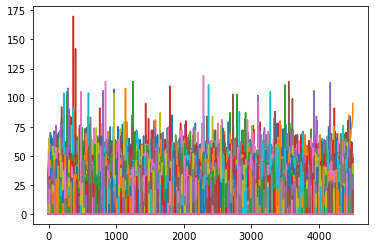

In [336]:
res.fillna(0).sort_values(by=1).reset_index(drop=True).plot(legend=False)

In [350]:
values = [50,70,75,80,85,90,100,150]
for val in values:
    print(f"val: {val} => {res[res < val].isna().sum().sum()/res.size * 100}")

val: 50 => 0.7353233830845771
val: 70 => 0.0693200663349917
val: 75 => 0.04245439469320066
val: 80 => 0.025538971807628524
val: 85 => 0.015588723051409618
val: 90 => 0.011608623548922056
val: 100 => 0.007960199004975124
val: 150 => 0.0003316749585406302


### Let's Try all

![Arcircitecture](https://i.ibb.co/j5PTCf8/artitecture.png)

In [ ]:
import sys
sys.path.append("../")
import pickle
import tensorflow as tf
import numpy as np
import nltk
import pandas as pd
import gensim.downloader
import gensim
from typing import Optional
import swifter
from PythonCode.preprocess.common import merge_datasets
from PythonCode.preprocess.word_embedding_features import sentence_level_preprocess
from sklearn.model_selection import train_test_split
from keras.layers import Dense, GRU, AvgPool1D
from keras.models import Sequential
from sklearn.metrics import classification_report
NUM_OF_SENTENCE_CHUNK = 3
MAX_LENGTH = 170
TEST_PART = 0.1
VALIDATION_PART = 0.2

In [ ]:
print("downloading pretrained embedding model.\nthis may take a while...")
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')
EMBEDDING_SIZE = 50

In [4]:
df = merge_datasets(data_path="../Data/C50")

In [5]:
(X_train, y_train),(X_test,y_test) = sentence_level_preprocess(df,glove_vectors)

TypeError: sentence_level_preprocess() missing 1 required positional argument: 'embedding_table'

In [38]:
model = Sequential()
model.add(GRU(100, recurrent_dropout=0.2, input_shape=(MAX_LENGTH, EMBEDDING_SIZE), return_sequences=True))
model.add(AvgPool1D(pool_size=(170,)))
model.add(Dense(50, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
print(model.summary())
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_PART)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="./sentence_level_preprocess-checkpoints", 
                                                               save_weights_only=False,
                                                               monitor='val_accuracy', mode='max',
                                                               save_best_only=True)
history = model.fit(x=X_train, y=y_train, epochs=30000, shuffle=True,
                    batch_size=200, validation_data=(X_val, y_val), callbacks=[callback,model_checkpoint_callback])
with open("sentence_level_preprocess-history","wb") as file:
    pickle.dump(history, file)
model.save("sentence_level_preprocess")
y_pred = model.predict(X_test)
print(classification_report(y_pred.argmax(axis=-1).flatten(),y_test.argmax(axis=-1).flatten()))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 170, 100)          45600     
_________________________________________________________________
average_pooling1d (AveragePo (None, 1, 100)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 50)             5050      
Total params: 50,650
Trainable params: 50,650
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30000
285/285 [==============================] - 127s 441ms/step - loss: 2.4644 - accuracy: 0.3194 - val_loss: 1.4596 - val_accuracy: 0.5308
INFO:tensorflow:Assets written to: .\sentence_level_preprocess-checkpoints\assets
Epoch 2/30000
285/285 [==============================] - 116s 409ms/step - loss: 1.2059 - accuracy: 0.6038 - val_loss: 0.9952 - val_accuracy: 0.66

KeyboardInterrupt: 

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_pred.argmax(axis=-1).flatten(),y_test.argmax(axis=-1).flatten()))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       224
           1       0.78      1.00      0.88        70
           2       0.23      0.39      0.29        92
           3       0.37      0.76      0.50        92
           4       0.85      0.67      0.75       268
           5       0.69      0.68      0.69       138
           6       0.86      1.00      0.92       244
           7       0.92      0.78      0.85       314
           8       0.72      0.82      0.77        68
           9       0.40      0.85      0.55        78
          10       1.00      0.88      0.94       238
          11       0.73      1.00      0.84       114
          12       1.00      0.92      0.96       288
          13       1.00      0.80      0.89       132
          14       0.20      0.27      0.23       134
          15       0.86      1.00      0.92        84
          16       0.92      0.72      0.80       212
          17       0.73    

In [40]:
from tensorflow import keras
model = keras.models.load_model('sentence_level_preprocess-checkpoints')

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_pred.argmax(axis=-1).flatten(),y_test.argmax(axis=-1).flatten()))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       204
           1       0.78      1.00      0.88        70
           2       0.35      0.49      0.41       110
           3       0.55      0.57      0.56       184
           4       0.88      0.73      0.79       256
           5       0.69      0.73      0.71       128
           6       0.94      1.00      0.97       266
           7       0.92      0.75      0.83       328
           8       0.82      0.84      0.83        76
           9       0.51      0.65      0.57       130
          10       1.00      0.93      0.96       226
          11       0.73      0.90      0.81       126
          12       0.92      1.00      0.96       244
          13       0.74      1.00      0.85        78
          14       0.10      0.18      0.13       100
          15       0.86      0.86      0.86        98
          16       0.92      0.72      0.80       212
          17       0.73    

### Hyper param tunning

In [1]:
import sys
sys.path.append("../")
import pickle
import tensorflow as tf
import numpy as np
import nltk
import pandas as pd
import gensim.downloader
import gensim
from typing import Optional
import swifter
from PythonCode.preprocess.common import merge_datasets
from PythonCode.preprocess.word_embedding_features import sentence_level_preprocess
from sklearn.model_selection import train_test_split
from keras.layers import Dense, GRU, AvgPool1D
from keras.models import Sequential
from sklearn.metrics import classification_report
NUM_OF_SENTENCE_CHUNK = 3
MAX_LENGTH = 170
TEST_PART = 0.1
VALIDATION_PART = 0.2

In [2]:
df = merge_datasets(data_path="../Data/C50")

In [ ]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

In [4]:
# class CustomDataGen(tf.keras.utils.Sequence):
    
#     def __init__(self, df,batch_size):
#         self.df = df.copy()
#         self.batch_size = batch_size
        
#     def on_epoch_end(self):
#         self.df = self.df.sample(frac=1).reset_index(drop=True)
    
#     def __get_output(self, label, num_classes):
#         return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
#     def __getitem__(self, index):
#         batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
#         X, y = (batches)
#         return X, y
    
#     def __len__(self):
#         return self.n // self.batch_size

In [5]:
EMBEDDING_SIZE = 300

In [6]:
from PythonCode.Constants import *
from PythonCode.preprocess.word_embedding_features import num_sentences_based_chucking,tranform_word,preprocess_labels
def sentence_level_preprocess(X,embedding_table):
    data = num_sentences_based_chucking(X, NUM_OF_SENTENCE_CHUNK)
    X_pre = np.zeros((data["y"].size, MAX_LENGTH, 300),dtype=np.float32)
    for i, text in enumerate(data["X"]):
        words = nltk.word_tokenize(text)
        for j, word in enumerate(words):
            embedding = tranform_word(word, embedding_table)
            if embedding is not None and j < MAX_LENGTH:
                X_pre[i, j] = embedding
    return X_pre, preprocess_labels(data["y"])

X_train, X_test, y_train, y_test = train_test_split(df[TEXT_COLUMN_NAME], df[AUTHOR_NAME_COLUMN_NAME],
                                                    test_size=TEST_PART)
X_train, y_train = sentence_level_preprocess(pd.concat([X_train.rename("X"), y_train.rename("y")], axis=1))

In [7]:
# (X_train, y_train),(X_test,y_test) = sentence_level_preprocess(df,glove_vectors)

In [3]:
with open('X_train.npy', 'rb') as f:
    X_train = np.load(f)
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)

In [12]:
from keras.layers import Lambda,Dropout
model = Sequential()
model.add(GRU(100, recurrent_dropout=0.5, input_shape=(MAX_LENGTH, 300), return_sequences=True))
model.add(AvgPool1D(pool_size=(170,)))
model.add(Dropout(0.1))
model.add(Dense(50, activation="softmax",kernel_regularizer='l1'))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 170, 100)          120600    
_________________________________________________________________
average_pooling1d_2 (Average (None, 1, 100)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 50)             5050      
Total params: 125,650
Trainable params: 125,650
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_name = "sentence_level_preprocess-300"
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_PART)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f"./{model_name}-checkpoints", 
                                                               save_weights_only=False,
                                                               monitor='val_accuracy', mode='max',
                                                               save_best_only=True)

In [6]:
from sklearn.utils import class_weight
simple_y_train = y_train.argmax(axis=-1).flatten()
class_weights = class_weight.compute_class_weight('balanced',np.unique(simple_y_train),simple_y_train)
dict_class_weights = {i:v for i,v in enumerate(class_weights)}

In [7]:
from tensorflow.python.keras.engine.training_utils_v1 import standardize_weights
standardize_weight_class = standardize_weights(simple_y_train,class_weight=dict_class_weights)

In [9]:
standardize_weight_class.shape,y_train.shape

((45456,), (45456, 1, 50))

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=200, shuffle=True,workers=8,use_multiprocessing=True,
                    sample_weight=standardize_weight_class,
                    batch_size=128, validation_data=(X_val, y_val), callbacks=[callback,model_checkpoint_callback])

Epoch 1/200
228/228 [==============================] - 280s 1s/step - loss: 5.1190 - accuracy: 0.1454 - val_loss: 3.6450 - val_accuracy: 0.2042
Epoch 2/200
228/228 [==============================] - 252s 1s/step - loss: 3.5213 - accuracy: 0.2171 - val_loss: 3.3592 - val_accuracy: 0.2900
Epoch 3/200
228/228 [==============================] - 247s 1s/step - loss: 3.2919 - accuracy: 0.3045 - val_loss: 3.1745 - val_accuracy: 0.3475
Epoch 4/200
228/228 [==============================] - 242s 1s/step - loss: 3.1418 - accuracy: 0.3933 - val_loss: 3.0257 - val_accuracy: 0.4581
INFO:tensorflow:Assets written to: .\sentence_level_preprocess-300-checkpoints\assets
Epoch 5/200
228/228 [==============================] - 253s 1s/step - loss: 3.0187 - accuracy: 0.4512 - val_loss: 2.9231 - val_accuracy: 0.4875
INFO:tensorflow:Assets written to: .\sentence_level_preprocess-300-checkpoints\assets
Epoch 6/200
228/228 [==============================] - 267s 1s/step - loss: 2.9336 - accuracy: 0.4815 - val_

In [4]:
with open('y_test.npy', 'rb') as f:
    y_test = np.load(f)
model = tf.keras.models.load_model('sentence_level_preprocess-300-checkpoints')

In [7]:
with open('X_test.npy', 'rb') as f:
    X_test = np.load(f)

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [2]:
y_pred = model.predict(X_test)
print(classification_report(y_pred.argmax(axis=-1).flatten(),y_test.argmax(axis=-1).flatten()))

NameError: name 'X_test' is not defined

## Fully Connected instead avg

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(GRU(150, recurrent_dropout=0.5, input_shape=(MAX_LENGTH, 300), return_sequences=True))
model.add(Dense(100,activation="relu",kernel_regularizer='l1'))
model.add(Dropout(0.3))
model.add(Dense(75,activation="relu"))
model.add(Dense(50, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

In [13]:
# with open(f"./{model_name}-history","wb") as file:
#     pickle.dump(history, file)
# model.save(model_name)
model = tf.keras.models.load_model('sentence_level_preprocess-300-checkpoints')
y_pred = model.predict(X_test)
print(classification_report(y_pred.argmax(axis=-1).flatten(),y_test.argmax(axis=-1).flatten()))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       144
           1       0.86      0.85      0.86       162
           2       0.76      0.81      0.79       254
           3       0.67      0.43      0.53       162
           4       0.91      0.88      0.89       238
           5       0.63      0.59      0.61       136
           6       0.75      0.93      0.83       152
           7       0.77      0.81      0.79       170
           8       0.90      0.80      0.84       196
           9       0.90      0.82      0.86       206
          10       1.00      0.93      0.97       180
          11       0.74      0.80      0.77       158
          12       1.00      0.81      0.90       226
          13       0.85      0.76      0.80       108
          14       0.56      0.56      0.56       142
          15       1.00      0.79      0.88        76
          16       1.00      1.00      1.00       106
          17       0.87    

<AxesSubplot:>

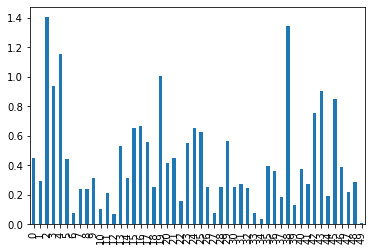

In [29]:
np.abs(pd.Series(y_test.argmax(axis=-1).flatten()).value_counts()/y_test.shape[0] * 100 - pd.Series(y_train.argmax(axis=-1).flatten()).value_counts()/y_train.shape[0] *100).plot(kind='bar')